## Descriptions

This notebook acts as hands-on before you attempt the quiz. There are several questions we have prepared here. 
Pikc some questions for each category and try to solve them. 

In [102]:
import pandas as pd 

# Data preparation
Before you go on, you need to prepare the data. Read `amazon-electronic.csv` data and fix them using necessary approach.

In [194]:
# 1. Read your data 
amazon = pd.read_csv('data_input/amazon-electronic.csv')

In [195]:
# 2.1 Peek first 3 row of you data 
amazon.head()

,id,product_id,date,categories,brand,name,merchant,quantity,unit_price
0,1,44342,2017-03-02,Camera & Photo,Panasonic,Lumix G 25mm f/1.7 ASPH. Lens,Bestbuy.com,1,"USD201,99"
1,2,46876,2017-03-02,Camera & Photo,Sony,Cyber-shot DSC-WX220 Digital Camera (Black),Bestbuy.com,1,"USD159,99"
2,3,12136,2017-03-02,Camera & Photo,Sony,Sony - BC-TRX Battery Charger - Black,Bestbuy.com,1,"USD26,99"
3,6,79238,2017-03-03,Accessories & Supplies,Insignia,"Insignia - Fixed TV Wall Mount For Most 40-70""...",Bestbuy.com,1,"USD56,99"
4,7,46643,2017-03-03,Camera & Photo,Sony,Cyber-shot DSC-RX100 V Digital Camera,Bestbuy.com,1,"USD849,99"


In [105]:
# 2.2 Inspect your data types
amazon.dtypes

id             int64
product_id     int64
date          object
categories    object
brand         object
name          object
merchant      object
quantity       int64
unit_price    object
dtype: object

In [218]:
# 3. Fix all datetime columns if any
amazon['date'] = pd.to_datetime(amazon['date'])

In [227]:
amazon.dtypes

id                     int64
product_id             int64
date          datetime64[ns]
categories            object
brand                 object
name                  object
merchant              object
quantity               int64
unit_price           float64
dtype: object

<!-- 
amazon['date'] = pd.to_datetime(amazon['date'])
-->

In [107]:
# 4. Fix all Categorical data if any

<!--
amazon[['categories', 'brand', 'merchant']] = amazon[['categories', 'brand', 'merchant']].astype('category')
-->

In [224]:
# 5. Fix all missing values / duplicates if any

<!--
amazon = amazon.dropna().drop_duplicates()
-->

In [228]:
amazon.head()

,id,product_id,date,categories,brand,name,merchant,quantity,unit_price
0,1,44342,2017-03-02,Camera & Photo,Panasonic,Lumix G 25mm f/1.7 ASPH. Lens,Bestbuy.com,1,201.99
1,2,46876,2017-03-02,Camera & Photo,Sony,Cyber-shot DSC-WX220 Digital Camera (Black),Bestbuy.com,1,159.99
2,3,12136,2017-03-02,Camera & Photo,Sony,Sony - BC-TRX Battery Charger - Black,Bestbuy.com,1,26.99
3,6,79238,2017-03-03,Accessories & Supplies,Insignia,"Insignia - Fixed TV Wall Mount For Most 40-70""...",Bestbuy.com,1,56.99
4,7,46643,2017-03-03,Camera & Photo,Sony,Cyber-shot DSC-RX100 V Digital Camera,Bestbuy.com,1,849.99


In [226]:
# 6. Fix  the unit price value

# change `USD` to ``
amazon['unit_price'] = amazon['unit_price'].str.replace('USD', '')

# change `,` to `.`
amazon['unit_price'] = amazon['unit_price'].str.replace(',', '.')

# change the data types to the most appropriate
amazon['unit_price'] = amazon['unit_price'].astype(float)

Make sure your first 5 rows looks like this 

|    |   id |   product_id | date       | categories             | brand     | name                                                                     | merchant    |   quantity |   unit_price |
|---:|-----:|-------------:|:-----------|:-----------------------|:----------|:-------------------------------------------------------------------------|:------------|-----------:|-------------:|
|  0 |    1 |        44342 | 2017-03-02 | Camera & Photo         | Panasonic | Lumix G 25mm f/1.7 ASPH. Lens                                            | Bestbuy.com |          1 |       201.99 |
|  1 |    2 |        46876 | 2017-03-02 | Camera & Photo         | Sony      | Cyber-shot DSC-WX220 Digital Camera (Black)                              | Bestbuy.com |          1 |       159.99 |
|  2 |    3 |        12136 | 2017-03-02 | Camera & Photo         | Sony      | Sony - BC-TRX Battery Charger - Black                                    | Bestbuy.com |          1 |        26.99 |
|  3 |    6 |        79238 | 2017-03-03 | Accessories & Supplies | Insignia  | Insignia - Fixed TV Wall Mount For Most 40-70"" TVs - Black NS-HTVMF0C"" | Bestbuy.com |          1 |        56.99 |
|  4 |    7 |        46643 | 2017-03-03 | Camera & Photo         | Sony      | Cyber-shot DSC-RX100 V Digital Camera                                    | Bestbuy.com |          1 |       849.99 |

## 1. Bestbuy Competitor

Bestbuy (known as `Bestbuy.com`), as one of the largest store in amazon is inspecting the market. Help them to see how other stores. 

But first, create a new dataframe that exclude Bestbuy from the observations. 

In [138]:
## Fill the missing code 
df = amazon.copy()
df['revenue'] = df['quantity'] * df['unit_price']
non_bestbuy = df[df['merchant'] != 'Bestbuy.com']

### QUESTION 1

What is top 5 competitor that has biggest revenue (sum of their quantity \* unit_price) ? Use groupby to wrangle the data to find the answer

<!--
df['revenue'] = df['quantity'] * df['unit_price']
non_bestbuy = df[df['merchant'] != 'Bestbuy.com']
x = non_bestbuy.groupby('merchant').agg({
    'revenue' : 'sum'
}).sort_values(by='revenue', ascending=False)
-->

In [232]:
## Code for Aggregation
# Wenny 
cond = df[df['merchant'] != 'Bestbuy.com'] #subseting
df_merchant = cond[['merchant','revenue']] 

merchant = df_merchant.groupby('merchant').sum().sort_values('revenue', ascending = False)
merchant

,revenue
merchant,
bhphotovideo.com,680478.02
Walmart.com,156398.50
Beach Camera,109862.75
The Pixel Hub,19190.00
Focus Camera,17271.00
Alto Music,11514.00


In [236]:
# Dina
vis1 = non_bestbuy.groupby('merchant').agg({
    'revenue': 'sum'
}).sort_values('revenue', ascending=False)

In [237]:
vis1

,revenue
merchant,
bhphotovideo.com,680478.02
Walmart.com,156398.50
Beach Camera,109862.75
The Pixel Hub,19190.00
Focus Camera,17271.00
Alto Music,11514.00


Make sure your answer looks like this

| merchant         |   revenue |
|:-----------------|----------:|
| bhphotovideo.com |    680478 |
| Walmart.com      |    156398 |
| Beach Camera     |    109863 |
| The Pixel Hub    |     19190 |
| Focus Camera     |     17271 |
| Alto Music       |     11514 |

Visualize the result in the most appropriate style !

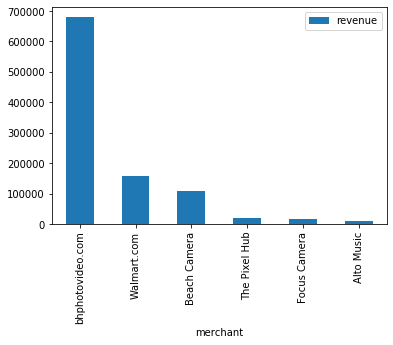

In [238]:
## Code for visualization
vis1.plot.bar()

### QUESTION 2

What is Bestbuy strong and weak against, compared to other merchant in the data? 

In order to asnwer this question I've created a guide to answer (There exist another way to find the answer, too)

In [239]:
# subset only bestbuy observations
bestbuy = df[df['merchant'] == 'Bestbuy.com']

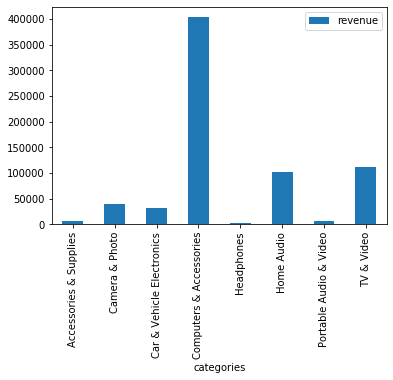

In [240]:
# plotting the bestbuy market basket
bestbuy.groupby('categories').agg({'revenue' : 'sum'}).plot.bar(stacked=True, legend=True)

Using `non_bestbuy`, use aggregation table to create table like this and save it as `non_bestbuy_agg`: 

Notes: Each values is representation of the sum of revenue for each categories and merchant


| categories                |   Alto Music |   Beach Camera |   Focus Camera |   The Pixel Hub |   Walmart.com |   bhphotovideo.com |
|:--------------------------|-------------:|---------------:|---------------:|----------------:|--------------:|-------------------:|
| Accessories & Supplies    |          nan |          nan   |         nan    |          nan    |       2398.75 |            1909.86 |
| Camera & Photo            |          nan |        11034.2 |        8635.5  |        18710.2  |       3838    |          196148    |
| Car & Vehicle Electronics |          nan |          nan   |         nan    |          nan    |       7676    |             nan    |
| Computers & Accessories   |          nan |         1919   |         nan    |          479.75 |      16791.2  |           85108.9  |
| Headphones                |        11514 |         8635.5 |        6236.75 |          nan    |       3838    |           23343.5  |
| Home Audio                |          nan |         6716.5 |        1919    |          nan    |      12953.2  |           82407.1  |
| Portable Audio & Video    |          nan |          nan   |         nan    |          nan    |        nan    |            5235.95 |
| TV & Video                |          nan |        81557.5 |         479.75 |          nan    |     108903    |          286325    |


<!--

non_bestbuy_agg = non_bestbuy.pivot_table(
    index='categories',
    columns='merchant',
    values='revenue', 
    aggfunc='sum'
)

-->


In [241]:
non_bestbuy_agg = non_bestbuy.pivot_table(
    index='categories',
    columns='merchant',
    values='revenue', 
    aggfunc='sum'
)


Plot the `non_bestbuy_agg` using the following code and try to compare the distribution with Bestbuy

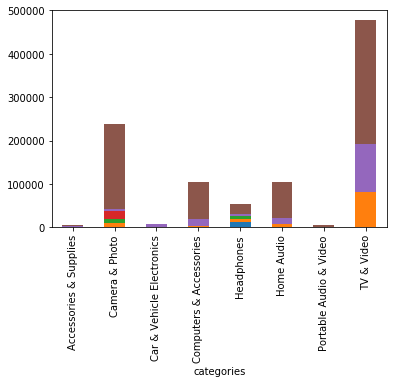

In [244]:
non_bestbuy_agg.plot.bar(stacked=True, legend=False)

### QUESTION 3

What product contributes the most to the total revenue for each categories in Bestbuy ? 

In [249]:
bestbuy.pivot_table(
    index='categories',
    columns='brand',
    
    values='revenue',
    aggfunc='sum'
)

brand,ASUS,Alienware,Alpine,Apple,Canon,Dell,Denon,Elite Screens,Insignia,Kenwood,...,Microsoft,Olympus,Onkyo,Panasonic,Pioneer,Razer,Samsung,SanDisk,Sony,Yamaha
categories,,,,,,,,,,,,,,,,,,,,,
Accessories & Supplies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4686.84,869.83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Camera & Photo,NaN,NaN,NaN,995.83,2249.97,NaN,NaN,NaN,NaN,NaN,...,NaN,389.99,NaN,6206.85,NaN,NaN,627.96,29.99,27765.43,757.94
Car & Vehicle Electronics,NaN,NaN,8604.03,NaN,NaN,NaN,NaN,NaN,NaN,15828.18,...,NaN,NaN,NaN,NaN,3491.65,NaN,NaN,NaN,2964.92,NaN
Computers & Accessories,30940.64,49617.64,NaN,195864.71,NaN,31346.53,NaN,NaN,962.81,NaN,...,2615.76,NaN,NaN,NaN,NaN,74238.72,904.96,579.96,1799.98,NaN
Headphones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,654.83,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.99,29.99,2494.83,NaN
Home Audio,NaN,NaN,NaN,NaN,NaN,NaN,3725.81,NaN,NaN,303.96,...,NaN,NaN,13586.67,NaN,21284.66,192.99,4341.83,NaN,30427.18,27194.90
Portable Audio & Video,NaN,NaN,NaN,5519.84,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,NaN
TV & Video,NaN,NaN,NaN,NaN,NaN,NaN,NaN,415.98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55856.39,NaN,39118.76,NaN


In [254]:
bestbuy.pivot_table(
    index='categories',
    columns='brand',
    
    values='revenue',
    aggfunc='sum'
).idxmax(axis=1)

categories
Accessories & Supplies       Elite Screens
Camera & Photo                        Sony
Car & Vehicle Electronics          Kenwood
Computers & Accessories              Apple
Headphones                            Sony
Home Audio                            Sony
Portable Audio & Video               Apple
TV & Video                         Samsung
dtype: object